# detecting cotton diseases using cnn


In [1]:
import keras

### import librases

In [4]:
from keras.models import Sequential

In [5]:
from keras.layers import Dense

In [6]:
from keras.layers import Conv2D

In [7]:
from keras.layers import MaxPool2D

In [8]:
from keras.layers import Flatten

### init the model

In [9]:
model1=Sequential()

In [10]:
model1.add(Conv2D(filters=8,kernel_size=(3,3),strides=(1,1),input_shape=(128,128,3),activation='relu'))

In [12]:
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [13]:
model1.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu'))
model1.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu'))

In [14]:
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [16]:
model1.add(Flatten())

In [18]:
model1.add(Dense(kernel_initializer="random_uniform",activation="relu",units=150))
model1.add(Dense(kernel_initializer="random_uniform",activation="relu",units=150))
model1.add(Dense(kernel_initializer="random_uniform",activation="relu",units=150))

In [19]:
model1.add(Dense(kernel_initializer="random_uniform",activation="softmax",units=4))

In [21]:
model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13456)             0         
_________________________________________________________________
dense (Dense)                (None, 150)               2

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen =ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
x_train=train_datagen.flow_from_directory(r'C:\Users\91918\cotton_plants\train',target_size=(128,128),color_mode='rgb',class_mode="categorical",batch_size=32)

Found 1951 images belonging to 4 classes.


In [29]:
x_test=test_datagen.flow_from_directory(r'C:\Users\91918\cotton_plants\test',target_size=(128,128),color_mode='rgb',class_mode="categorical",batch_size=32)

Found 18 images belonging to 4 classes.


In [32]:
import matplotlib.pyplot as plt

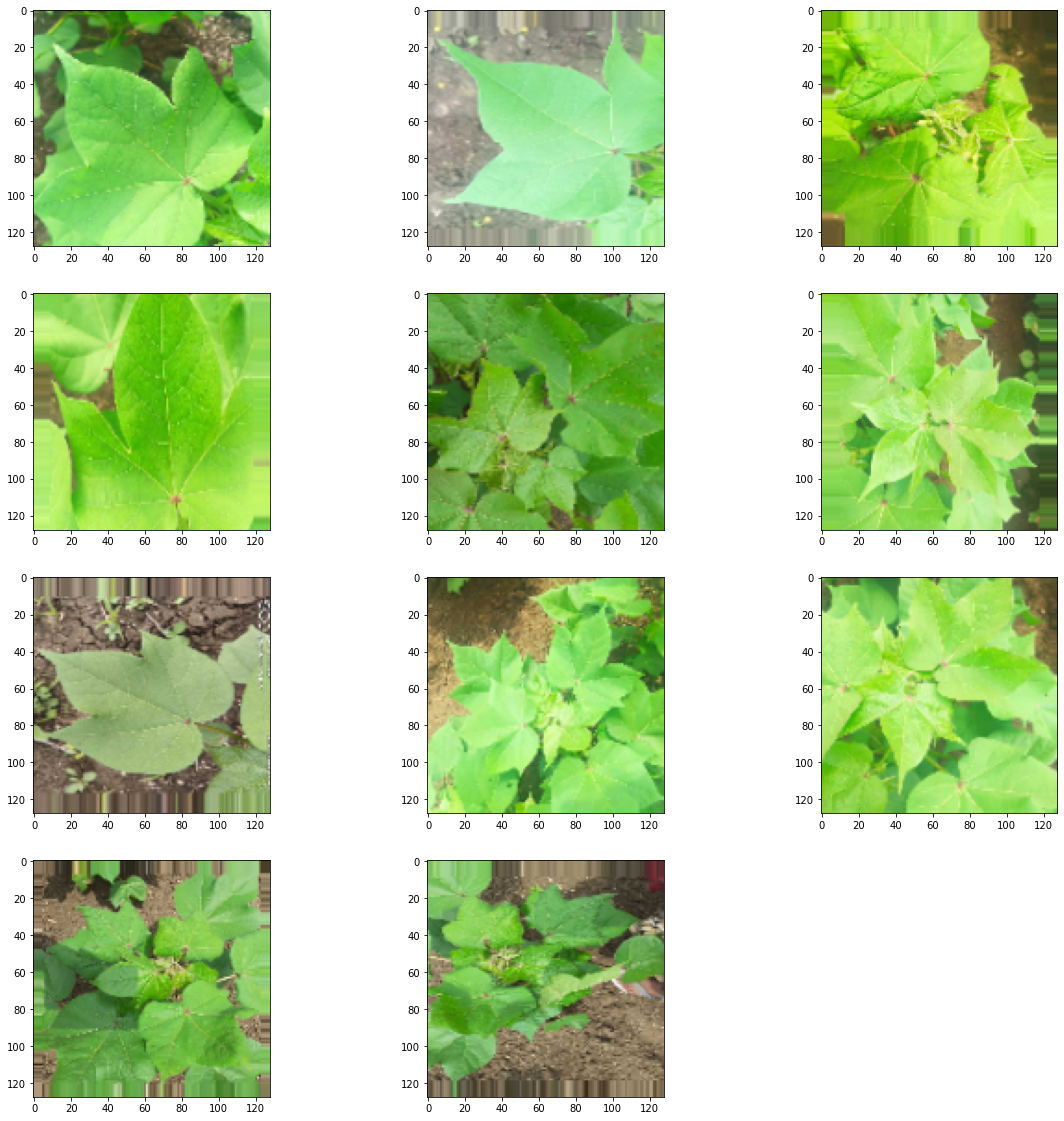

In [33]:
plt.figure(figsize=(20,20))
for i,image in enumerate(x_train,1):
    if(i==12):
        break
    plt.subplot(4,3,i)
    plt.imshow(image[0][10])

In [34]:
x_train.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [35]:
x_test.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [36]:
len(x_test)

1

In [37]:
len(x_train)

61

In [39]:
model1.fit_generator(x_train,steps_per_epoch=61,epochs=100,validation_data=x_test,validation_steps=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
61/61 [==============================] - 87s 1s/step - loss: 1.2950 - accuracy: 0.4198 - val_loss: 1.2696 - val_accuracy: 0.3889
Epoch 2/100
61/61 [==============================] - 55s 908ms/step - loss: 1.0453 - accuracy: 0.5577 - val_loss: 0.9925 - val_accuracy: 0.6667
Epoch 3/100
61/61 [==============================] - 52s 849ms/step - loss: 0.8350 - accuracy: 0.6617 - val_loss: 0.5636 - val_accuracy: 0.7778
Epoch 4/100
61/61 [==============================] - 53s 862ms/step - loss: 0.7508 - accuracy: 0.6981 - val_loss: 0.6477 - val_accuracy: 0.7222
Epoch 5/100
61/61 [==============================] - 52s 851ms/step - loss: 0.6458 - accuracy: 0.7371 - val_loss: 0.6983 - val_accuracy: 0.7222
Epoch 6/100
61/61 [==============================] - 52s 858ms/step - loss: 0.5978 - accuracy: 0.7524 - val_loss: 0.4259 - val_accuracy: 0.8333
Epoch 7/100
61/61 [==============================] - 52s 852ms/

KeyboardInterrupt: 

In [40]:
model1.save('cotton_pred.h5')

In [47]:
from keras.models import load_model
import cv2

In [58]:
import numpy as np

In [67]:
def detect(frame):
    
    
    
    img=cv2.resize(frame,(128,128))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if (np.max(img)>1):
        img=img/255
        
    img=np.array([img])
    prediction=model1.predict_classes(img)
    label=["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
    prediction=prediction[0]
    print("Prediction:",prediction)
    return label[prediction]

In [68]:
data1=r'C:\Users\91918\cotton_plants\train\diseased cotton plant\dd (1)_iaip.jpg'

In [69]:
image=cv2.imread(data1)

In [70]:
detect(image)

Prediction: 1


'diseased cotton plant'

In [95]:
import numpy as np
from tkinter import *
#PIL--Python Imaging Library
#ImageTk is used to convert your image into 
#Tkinter comaptaible format
from PIL import ImageTk, Image
#filedialog is used to select a file
from tkinter import filedialog
#operating system
import os
#to load the saved keras model
from keras.models import load_model

import cv2

classifier = load_model('cotton_pred.h5')

#Root GUI window
root = Tk()
root.geometry("550x300+200+200")
root.resizable(width=True, height=True)

def openfn():
    #askopenfilename function Opens a File Diolog
    filepath = filedialog.askopenfilename(title='Select a Image')#Title of File Dialog
    return filepath
def open_img():
    #We get path of select image
    filepath = openfn()
    print(filepath)
    image=cv2.imread(filepath)
    img=cv2.resize(image,(128,128))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if(np.max(img)>1):
            img = img/255.0
    img=np.array([img])
    
    result = classifier.predict_classes(img)

    classes=["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
    result=result[0]
    print("Prediction:",result)
    #Label function in tkinter is used to display a text
    #1.Root--GUI Window
    #2.Text we want to display in the label
    #scroll_bar = Scrollbar(root) 
    #scroll_bar.pack( side = RIGHT,fill = Y )
    #mylist = Listbox(root,yscrollcommand = scroll_bar.set )
    
    
    
    label = Label( root, text="Prediction : "+classes[result])
    label.pack()
    #Displying the image in tkinter window
    
    #Opening the Image from the file path
    img = Image.open(filepath)
    #Resise the image to (250,200)
    img = img.resize((250, 250), Image.ANTIALIAS)
    #ImageTk Image Tkinter
    #PhotoImage function convert image into Tkinter comptaible format
    img = ImageTk.PhotoImage(img)
    #Display the image
    panel = Label(root, image=img)
    panel.image = img
    panel.pack()
    #mylist.pack( side = LEFT, fill = BOTH )
    #scroll_bar.config( command = label.yview )
#1.Where you want to place your button
#2.Text
#3.command what action should be performed when user clicks  on the button

  

btn = Button(root, text='Select Image', command=open_img).pack()

root.mainloop()


C:/Users/91918/cell_images/test_data/Uninfected/C93P54ThinF_IMG_20150821_163640_cell_181.png
Prediction: 0
C:/Users/91918/cell_images/test_data/Uninfected/C93P54ThinF_IMG_20150821_163640_cell_182.png
Prediction: 0
C:/Users/91918/cell_images/test_data/Uninfected/C93P54ThinF_IMG_20150821_163815_cell_170.png
Prediction: 1
